# Data and Sampling Distributions

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import pylab

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loans_income = pd.read_csv('../data/loans_income.csv')
sp500_px = pd.read_csv('../data/sp500_px.csv')

# Chapter Contents:
1. Random Sampling and Sample Bias
    1. Bias
    2. Random Selection
2. Selection Bias:
    1. Regression to the Mean
3. Sampling Distribution of a Statistic
    1. Central Limit Theorem
    2. Standard Error
4. The Bootstrap
    1. Resampling vs Bootstrapping
5.  Confidence Interval
6. Normal Distribution and QQ Plots
7. Long-Tailed Distributions
8. Students t-distribution - **Not Elaborated**:
9. Binomial Distribution
10. Poisson Distribution - **Not Elaborated**
    1. Exponential Distribution
    2. Estimating the Failure Rate
    3. Weibull Distribution

## Chapter Notes
- Sampling is required to reduce bias in a dataset. Predictive Models need to be developed and piloted with samples.

### 1. Random Sampling and Bias

- Sample is a subset of data from a larger data-set. The larger data-set is called as the population.


- What is Stratified Sampling?
    -  Divinding the population into a strata and randomly sampling from each strata
    
    
- What is a strata?
    -  Stratification is the process of dividing members of the population into homogeneous subgroups before sampling.   
    -  The strata should be mutually exclusive: every element in the population must be assigned to only one stratum. 
    -  The strata should also be collectively exhaustive: no population element can be excluded.
    
    
- What is sample bias?
    -  A sample that misrepresents the population
    
    
- Statistical bias refers to the measurement or sampling errors that are systematic and produced by the measurement or sampling process.


- Why is Random Sampling important?
    -  ___Because Data Quality matters over Data Quantity___.
    -  Lets take the example of Literary Digest poll of 1936. During the great depression, many people in USA did not have money for the 'Literary Digest'.
    -  So when the Literary Digest conducted a poll predicting who will win (Landon (Republican) or Roosevelt (Democrat)), it predicted that Landon will win by a ___landslide___. 
    -  However it turned out that Roosevelt was the one that won the election.
    -  What happened here? 
        -  It turns out that Majority of the people who could afford the Literary Digest were of a generally ___higher___ socio-economic background than the larger population at hand. They owned telephones, automobiles and hence they occured on the marketers list in the first place. 
        -  This is called as a ___Sample Bias___ ,i.e, the sample was different in some meaningful "non-random" way from the larger population it was meant to represent.
        -  The term __non-random__ is important since hardly any sample, including random samples, will be exactly representative of the population.
        -  Sample Bias occurs when the difference is meaningful, and can be expected to continue for other samples drawn in the same way as the first.
        
### 2. Selection Bias

- What is a Bias?
    - It refers to the measurement or sampling errors that are systematic and produced by the measurement or sampling process.
    
    
- To avoid bias, you need to understand data.


- For example when you are doing a customer survey for a Shopping mall, you need to define who a customer is.
    -  Do we select all customers whose purchase amount > 0?
    -  Do we include all past customers? 
    -  Do we include all refunds?
    -  Should we do internal test purchases?


- Next you need to define a sampling procedure. It maybe selecting 100 customers at random.


- In stratified sampling, the population is divided into strata and random sample is taken from each strata.


- What is the vast search effect?
    - Bias or non-reproducibility resulting from repeated data modeling, or modeling data with large numbers of predictable.
    

- What is selection bias?
    -  Refers to practice of selectively choosing data in a way that leads to a conclusion that is misleading or ephemeral.
    

- **Regression to the Mean (Means to 'go-back')**: Refers to the phenomenon of involving successive measurements on a given variable: extreme observations followed by more central ones. Example will be that children of tall men dont tend to be as tall. Another example is that rookie of year, **sophmore slump phenomenon**.


### 3. Sampling Distribution of a Statistic:


- The distribution of a sample statistic such as the mean is likely to be more regular and bell-shaped than the distribution itself.





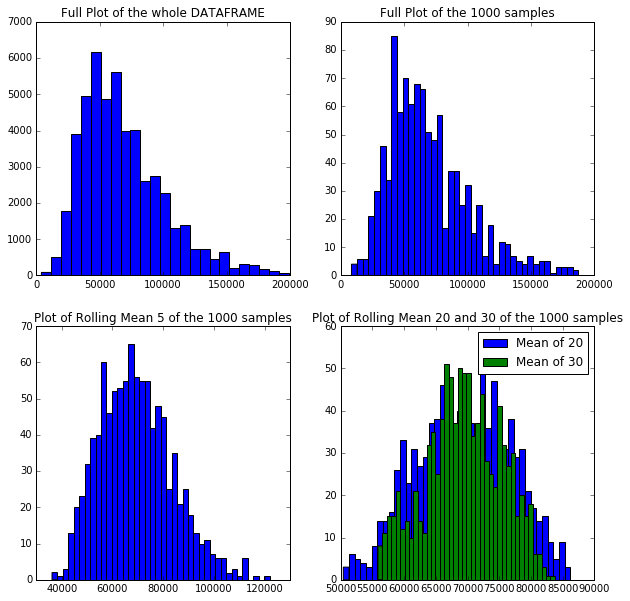

In [3]:
#Calculating a rolling mean:

#Take a 1000 Samples
samples = loans_income.sample(n=1000)

#mean of 5 numbers
sample_mean_5 = samples.rolling(5).mean().x
sample_mean_5 = sample_mean_5.dropna()

#mean of 20 numbers
sample_mean_20 = samples.rolling(20).mean().x
sample_mean_20 = sample_mean_20.dropna()

# mean of 30 numbers
sample_mean_30 = samples.rolling(30).mean().x
sample_mean_30 = sample_mean_30.dropna()

fig = plt.figure(figsize=(10,10))
#The full distribution of the plot:
ax = fig.add_subplot(2,2,1)
ax.hist(loans_income.x,bins=25)
plt.title('Full Plot of the whole DATAFRAME')

#distribution of 1000 samples:

ax = fig.add_subplot(2,2,2)
ax.hist(samples.x,bins=40)
plt.title('Full Plot of the 1000 samples')

#distribution of means of 5 numbers from 1000 samples:
ax = fig.add_subplot(2,2,3)
ax.hist(sample_mean_5,bins=40)
plt.title('Plot of Rolling Mean 5 of the 1000 samples')

#distribution of means of 20 numbers from 1000 samples:
ax = fig.add_subplot(2,2,4)
ax.hist(sample_mean_20,bins=40,label='Mean of 20')
ax.hist(sample_mean_30,bins=40,label='Mean of 30')
plt.title('Plot of Rolling Mean 20 and 30 of the 1000 samples')
ax.legend()
plt.show()

plt.show()

#### Central Limit Theorem

- CLT is a phenonmenon in which the distribution tends to take a more a normal distribution as the sample size increases.
- Means drawn from multiple samples will resemble bell-shaped Normal curve even if the source population is not normally distributed.
- How to measure the variability of a sampling distribution?
    -  StandardError(SE) = s/sqrt(n) 
        - s = standard deviation
        - n = number of samples
    - AS the sameple size increases, the standard Error decreases.
    
### 4. The Bootstrap

- Estimating the sampling distribution of a statistic, or of model parameters, is to draw additional samples, with replacement, from the sample itself and recalculate the statistic or model for each resample.

**Resampling**- The process of taking repeated samples from observed data-set, including both bootstrap and permutation (shuffling) procedures.

    

#### Population stats

In [4]:
#Calculating a rolling mean:
print('Total Population STD : ',loans_income.x.std())
print('Total Population Mean : ',loans_income.x.mean())
print('Total Population Median : ',np.median(loans_income.x))
print('Total Population Standard Error:',stats.sem(loans_income.x, ddof=1))

Total Population STD :  32872.03536985002
Total Population Mean :  68760.51844
Total Population Median :  62000.0
Total Population Standard Error: 147.00821129152527


#### Bootstrapping for 1000,10000,20000 Samples

In [5]:
bootstrap_1000 = np.random.choice(loans_income.x,size=1000,replace=True)
bootstrap_10000 = np.random.choice(loans_income.x,size=10000,replace=True)
bootstrap_20000 = np.random.choice(loans_income.x,size=20000,replace=True)
arr_bootstraps = [bootstrap_1000,bootstrap_10000,bootstrap_20000]
len(arr_bootstraps)

3

In [6]:
#Calculating a rolling mean:
for i in range(len(arr_bootstraps)):
    print('Bootstrap Stats for {} examples \n'.format(len(arr_bootstraps[i])))
    print('------------------------------------------------------------------------------\n')
    print('Bootstrap STD : ',np.std(arr_bootstraps[i],ddof=1))
    print('Bootstrap Mean : ',np.mean(arr_bootstraps[i]))
    print('Bootstrap Median: ',np.median(arr_bootstraps[i]))
    print('Boostrap Bias, ',loans_income.x.mean() - np.mean(arr_bootstraps[i],axis=0))
    print('Standard Error:',stats.sem(arr_bootstraps[i], ddof=1))
    print('\n------------------------------------------------------------------------------\n')

Bootstrap Stats for 1000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  31806.639601769246
Bootstrap Mean :  67877.339
Bootstrap Median:  60000.0
Boostrap Bias,  883.1794399999926
Standard Error: 1005.8142585770177

------------------------------------------------------------------------------

Bootstrap Stats for 10000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  33227.51415697053
Bootstrap Mean :  68853.9528
Bootstrap Median:  62000.0
Boostrap Bias,  -93.43435999999929
Standard Error: 332.2751415697053

------------------------------------------------------------------------------

Bootstrap Stats for 20000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32999.598302280836
Bootstrap Mean :  69052.11515
Bootstrap Median:  62000.0
Boostrap Bias,  -291.596709999998
Standard Error: 233.3423973597486

------

###  Bootstrapping is used to improve the efficiency of Decision Trees. 
### DT's which utilize Bootstrapping are also called as Random Forests.

#### Bagging is the process of running multiple classification and regression trees, and then averaging their predictions. It generally performs better than a single tree.

### 5. Confidence Interval
- Confidence level:
    - The percentage of confidence interval, contructed in the same way from the same population, expected to contain the statistic of interest.
    - What is the probablity that the true value lies within a certain interval?

### 6. Normal Distribution

- What does Standardizing the data mean?
    - It essentially means to subtract the mean from a data-point selected from the dataset and dividing the result by the standard deviation.
    
- What is Standard Normal?
    - A normal distribution with mean =0 and std = 1
    
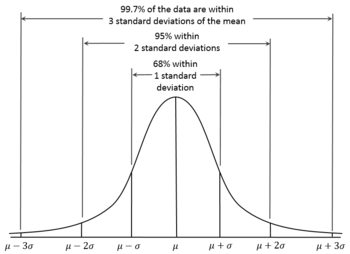

### 7. Long-tailed Distributions and QQ-Plot
- What is a QQ Plot?
    - A plot to visualize how close a sample is to a normal distribution

In [7]:
stats.probplot(loans_income.x, dist="norm", plot=pylab
pylab.show()

SyntaxError: invalid syntax (<ipython-input-7-5eb2eef7d39a>, line 2)

#### The above qq plot tells us that the sample which we have is not normally distributed

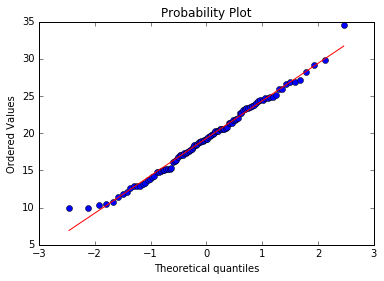

In [8]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

#### The above qq plot tells us that the sample which we have is normally distributed

- What is a Long-tailed Distribution?
    - A long-tailed distribution is one in which the extreme values occur at low frequency.
    - That way a distributed is said to be skewed when one tail is longer than the other.

- Lets check whether sp500_px['NFLX'] is skewed or has a tail.

In [9]:
nflx = sp500_px.loc[:,'NFLX']

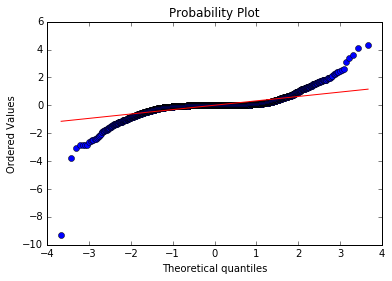

In [10]:
stats.probplot(nflx, dist="norm", plot=pylab)
pylab.show()

/Users/pushkarajjoshi/anaconda3/envs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/pushkarajjoshi/anaconda3/envs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/pushkarajjoshi/anaconda3/envs/datascience/lib/python3.6/site-packages/numpy/lib/function_base.py:1174: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


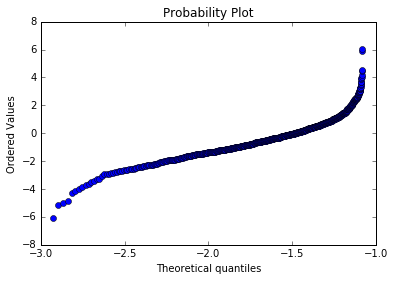

In [11]:
# After standardizing tread

treated_nflx = np.diff(np.log(nflx))
stats.probplot(treated_nflx, dist="norm", plot=pylab,fit=True)
pylab.show()

### 9. Binomial Distribution
- Binomial - Two Outcomes
- Binomial trial - A trial with two outcomes
- Binomial Distribution - A Distribution of number of successes in x-trials

- Major example being the coin toss.

In [12]:
>>> n, p = 10, .5  # number of trials, probability of each trial
>>> s = np.random.binomial(n, p, 1000)
# result of flipping a coin 10 times, tested 1000 times.

#What is probablity of getting zero success in the 1000 test

print(sum(s==0)/1000)

0.001
